# SVM 多クラス分類，Iris

In [1]:
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm

from sklearn.svm import SVC
#from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn import datasets

from mlxtend.plotting import plot_decision_regions #決定領域のプロット，外部ライブラリを利用

FLAG_fig = False

irisデータのうち，sepal（がく）と petal（花びら）の長さ[cm]によるクラス分類を行う。  
iris.dataの0番目と2番目の要素だけを抽出してXの配列(150 x 2)に格納    
クラス(花びらの種類 0:Iris-Setosa, 1:Iris-Versicolour, 2:Iris-Virginica)を y(150 x 1)に格納

In [2]:
# Load iris data
iris = datasets.load_iris()
X = iris.data[:, [0, 2]]
y = iris.target

In [3]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
y[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

ガウシアンカーネルで ovr(one-vs-rest) と ovo(one-vs-one) の比較を行う  
ディフォルトで decision_function_shape='ovr'であるが，敢えて明示的に指定

In [5]:
clf = SVC(C=0.5, kernel='rbf', decision_function_shape='ovr').fit(X,y)
print(clf)
y_pred = clf.predict(X)
print('Accuracy = ',accuracy_score(y, y_pred))
print(classification_report(y, y_pred))

SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
Accuracy =  0.96
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.92      0.96      0.94        50
           2       0.96      0.92      0.94        50

   micro avg       0.96      0.96      0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150



/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


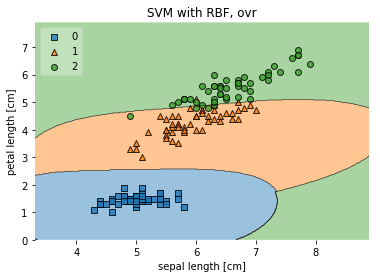

In [6]:
plot_decision_regions(X,y, clf=clf, res=0.02, legend=2)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('SVM with RBF, ovr')
plt.show()

decision_function_shape='ovo'とする

In [7]:
clf = SVC(C=0.5, kernel='rbf', decision_function_shape='ovo').fit(X,y)
print(clf)
y_pred = clf.predict(X)
print('Accuracy = ',accuracy_score(y, y_pred))
print(classification_report(y, y_pred))

SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
Accuracy =  0.96
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.92      0.96      0.94        50
           2       0.96      0.92      0.94        50

   micro avg       0.96      0.96      0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150



/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


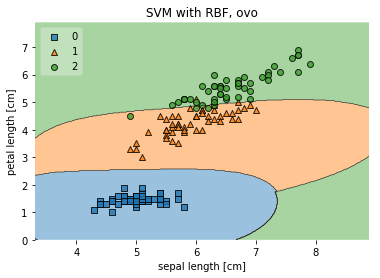

In [8]:
plot_decision_regions(X,y, clf=clf, res=0.02, legend=2)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('SVM with RBF, ovo')
plt.show()

次に，グリッドサーチを用いて，irisデータに対する最良のクラス分類器を求める

In [9]:
# グリッドサーチ用パラメータを設定
parameters = {'kernel':('linear', 'rbf', 'poly'), 'C':[0.1, 1.0, 10.0], 
              'gamma':[0.01, 0.1, 1.0, 10.0], 'decision_function_shape':('ovo', 'ovr')}
svm = SVC()

In [10]:
# グリッドサーチを実行
clf = GridSearchCV(svm, parameters, scoring='accuracy', cv=5) #交差検証のデータ分割を5とした
clf.fit(X, y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'kernel': ('linear', 'rbf', 'poly'), 'C': [0.1, 1.0, 10.0], 'gamma': [0.01, 0.1, 1.0, 10.0], 'decision_function_shape': ('ovo', 'ovr')},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [11]:
# 最良パラメータを表示
print('Best accuracy =', clf.best_score_)
print(clf.best_params_)

Best accuracy = 0.9666666666666667
{'C': 0.1, 'decision_function_shape': 'ovo', 'gamma': 10.0, 'kernel': 'poly'}


decision_function_shape='ovo'と'ovr'のどちらが識別精度が良いか論ぜよ

Accuracy = 0.9666666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.92      0.95        50
           2       0.92      0.98      0.95        50

   micro avg       0.97      0.97      0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



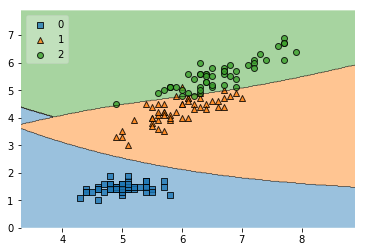

In [12]:
# 最適パラメータによる識別器を全データに適用，テストデータは後述
bst_clf = clf.best_estimator_
y_est = bst_clf.predict(X)
print('Accuracy =', accuracy_score(y, y_est))
print(classification_report(y, y_est))
plot_decision_regions(X,y, clf=bst_clf, res=0.02, legend=2)
if FLAG_fig: plt.savefig('fig_SVM_MClass_Iris_01.png')
plt.show()

#### 4つの説明変数を用いる
SVCのパラメータの決め方は，本来ならば改めてGridSearchを適用するところであるが，ここでは，上のGrid Searchの結果に従う。

In [19]:
X = iris.data
y = iris.target
clf = SVC(C=0.1, kernel='poly', gamma=10.0, decision_function_shape='ovo').fit(X,y)
print(clf)
y_pred = clf.predict(X)
print('Accuracy = ',accuracy_score(y, y_pred))
print(classification_report(y, y_pred))

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma=10.0, kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Accuracy =  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        50

   micro avg       1.00      1.00      1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



上記では，２変数からのGird Searchの結果を流用して，４変数のモデルを作っている．
下記で，改めて４変数を用いたgrid search をプログラムして，実行せよ

In [13]:
#4変数grid search
# グリッドサーチ用パラメータを設定
#parameters = {'kernel':('linear', 'rbf', 'poly'), 'C':[0.1, 1.0, 10.0], 
              #'gamma':[0.01, 0.1, 1.0, 10.0], 'decision_function_shape':('ovo', 'ovr')}

tuned_parameters = [
    {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
    {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.001, 0.0001]},
    {'C': [1, 10, 100, 1000], 'kernel': ['poly'], 'degree': [2, 3, 4], 'gamma': [0.001, 0.0001]},
    {'C': [1, 10, 100, 1000], 'kernel': ['sigmoid'], 'gamma': [0.001, 0.0001]}
    ]
    
svm = SVC()
score = 'f1'
# グリッドサーチを実行
clf = GridSearchCV(svm, tuned_parameters, scoring='%s_weighted' % score , cv=5) #交差検証のデータ分割を5とした
clf.fit(X, y)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']}, {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.001, 0.0001]}, {'C': [1, 10, 100, 1000], 'kernel': ['poly'], 'degree': [2, 3, 4], 'gamma': [0.001, 0.0001]}, {'C': [1, 10, 100, 1000], 'kernel': ['sigmoid'], 'gamma': [0.001, 0.0001]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1_weighted', verbose=0)

In [14]:
plt.scatter(X[:,0],X[:,2], c=y_est, cmap=cm.bwr, edgecolors='k')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
if FLAG_fig: plt.savefig('fig_SVM_MClass_Iris_02.png')
plt.show()

IndexError: index 2 is out of bounds for axis 1 with size 2

In [ ]:
#15
plt.scatter(X[:,1],X[:,3], c=y_est, cmap=cm.bwr, edgecolors='k')
plt.xlabel('sepal width [cm]')
plt.ylabel('petal widht [cm]')
if FLAG_fig: plt.savefig('fig_SVM_MClass_Iris_03.png')
plt.show()